In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import itertools as itr

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
X = df[['Mileage']]
y = df.Price

In [5]:
linreg = LinearRegression()

In [6]:
linreg.fit(X, y)

/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Part 1
#### 1. Find the linear regression equation for mileage vs price.

In [7]:
print('Equation: Price = ', linreg.coef_[0],'* Mileage + ', linreg.intercept_)

Equation: Price =  -0.172520502791 * Mileage +  24764.5590061


#### 2. Chart the original data and the equation on the chart.

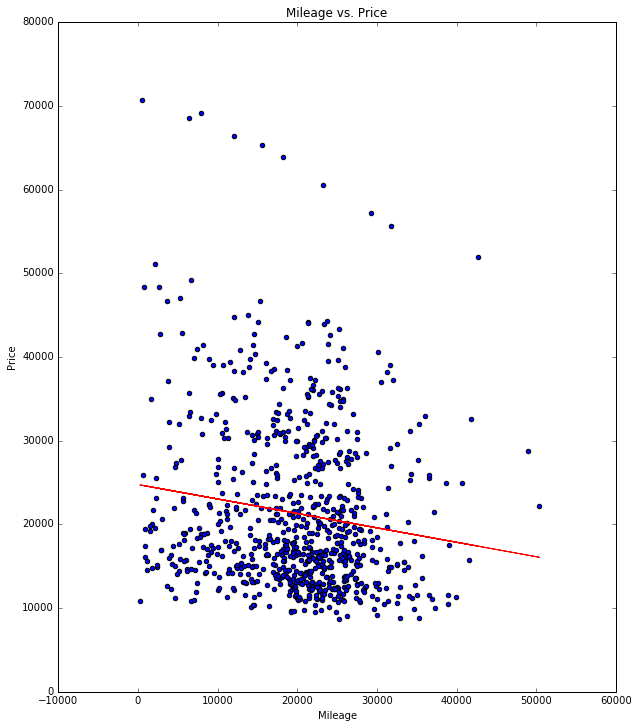

In [8]:
df.plot(kind='scatter', x='Mileage', y='Price', figsize=(10,12), title='Mileage vs. Price')
plt.plot(X, linreg.predict(X), color='r')

#### 3. Find the equation's  R<sup>2</sup>  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [9]:
print('R-squared: ', linreg.score(X, y))

R-squared:  0.0204634473235


This is a lousy, lousy fit for our data.

## Part 2
#### 1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [10]:
col_names = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
X = df[col_names]
y = df.Price

In [11]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print('Equation: Price = ', *zip(linreg.coef_, col_names), ' + ',linreg.intercept_)

Equation: Price =  (-0.16974783233303678, 'Mileage') (3792.3789307825205, 'Cylinder') (-787.22073163383016, 'Liter') (-1542.7458463820631, 'Doors') (6288.9971498499326, 'Cruise') (-1993.7952756984257, 'Sound') (3349.3616196135517, 'Leather')  +  6758.7551436


#### 2. Find the equation's  R<sup>2</sup>  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [13]:
print('R-squared: ', linreg.score(X, y))

R-squared:  0.446264353673


This is better than just mileage alone, but still isn't very good.

#### 3. Find the combination of the factors that is the best predictor for price.

In [14]:
def all_combs(iter):
    combs = []
    for L in range(1, len(iter)+1):
        for subset in itr.combinations(iter, L):
            combs.append(list(subset))
    return combs

In [15]:
combs = all_combs(col_names)

In [16]:
max([(LinearRegression().fit(df[comb], df.Price).score(df[comb], df.Price), comb) for comb in combs])

(0.44626435367283801,
 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'])

It appears the best combination of factors is **all** of the factors combined, which must mean that each in its own way provides a meaningful contribution to estimated the price of a car.

## Part 3
#### 1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [17]:
make_df = pd.get_dummies(df.Make)

In [18]:
df = df.merge(make_df, left_index=True, right_index=True)

In [19]:
model_df = pd.get_dummies(df.Model)

In [20]:
df = df.merge(model_df, left_index=True, right_index=True)

In [21]:
type_df = pd.get_dummies(df.Type)

In [22]:
df = df.merge(type_df, left_index=True, right_index=True)

In [23]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8,Convertible,Coupe,Hatchback,Sedan,Wagon
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Looks like everything's there.

#### 2. Find the best combination of factors to predict price.

In [24]:
col_names = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make', 'Model', 'Type']

The below function is meant to replace the features of 'Make', 'Model', and 'Type' with the columns representing the dummy variables for those features when they appear in combinations.  That way the number of possible combinations is reduced to a manageable amount and ensures that **all** the dummy variable columns associated with each feature were included.

In [26]:
def clean_comb(comb):
    return_list = comb[:]
    if 'Make' in return_list:
        return_list += list(df.Make.unique())
        return_list.remove('Make')
    if 'Model' in return_list:
        return_list += list(df.Model.unique())
        return_list.remove('Model')
    if 'Type' in return_list:
        return_list += list(df.Type.unique())
        return_list.remove('Type')
    return return_list

In [27]:
combs = all_combs(col_names)

In [28]:
max([(LinearRegression().fit(df[clean_comb(comb)], df.Price).score(df[clean_comb(comb)], df.Price), comb) for comb in combs])

(0.98047687024475039,
 ['Mileage',
  'Cylinder',
  'Liter',
  'Doors',
  'Cruise',
  'Sound',
  'Leather',
  'Model',
  'Type'])

The best combination of features is all of the features, 'Make' excluded.  This makes sense, though, since individual models are particular to a specific make.  For example, 'Corvette' implies Chevrolet and 'GTO' implies Pontiac, so the details of 'Make' are redundant when 'Model' is provided.